# Filter non-sense Peaks in dataset

In [1]:
import h5py
import re
import numpy as np
import imageio
import os

In [2]:
path = "D:/BMR-DS/Project_2/DataSet/count_matrix.h5"
f = h5py.File(path, 'r')
print(f.keys())

mz = np.array(f['cmz'])
dim_xy = np.array(f["dim_xy"])
data = np.array(f["counts_mat"])
data = np.reshape(data, (dim_xy[1], dim_xy[0], data.shape[1]))

print(data.shape)

f.close()

<KeysViewHDF5 ['cmz', 'counts_mat', 'dim_xy']>
(106, 134, 1051)


In [3]:
print(len(mz))

1051


In [2]:
z=[]
z.append([1,2,3,4])
z.append([0,1,3,4])
print(z)

[[1, 2, 3], [0, 1, 3]]


## Read mz values common  in brain images

In [8]:
lpath = "D:/BMR-DS/Project_2/DataSet/peaks.txt"

list = open(lpath)
peaklist = []
for i in list.readlines():
    if i != "":
        peaklist.append(float(i))
print(peaklist)

[255.2331, 283.2643, 284.27, 286.2831, 294.2439, 299.2592, 303.233, 306.233, 308.2595, 310.2752, 329.25, 331.27, 646.6144, 648.3882, 664.4195, 767.56, 778.59, 808.5134, 812.55, 816.575, 834.5948, 866.5917, 868.5921, 885.5742, 886.5742, 887.5647, 893.6488, 900.66, 903.5, 904.6189]


## Pick the peaks based on the list

In [14]:
for p in peaklist:
    image = np.zeros((dim_xy[1], dim_xy[0], 3))
    for i in range(dim_xy[1]):
        for j in range(dim_xy[0]):
            position = np.where(np.ceil(data[i][j]) == np.ceil(p))[0]
            if len(position) > 0:
                image[i][j][0] = sum(data[i][j][position])
                image[i][j][1] = sum(data[i][j][position])
                image[i][j][2] = sum(data[i][j][position])
    path = os.path.join('D:/BMR-DS/Project_2/DataSet/brain_100um_mz_peaks_new','brain_'+str(int(np.ceil(p)))+'.png')
    imageio.imsave(path, image[:,:,1])
    

Lossy conversion from float64 to uint8. Range [0.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 852.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 855.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1435.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 885.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1500.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1216.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1228.0]. Convert image to uint8 prior to saving to suppress this warn

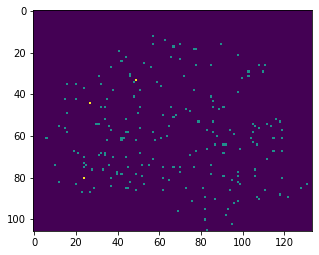

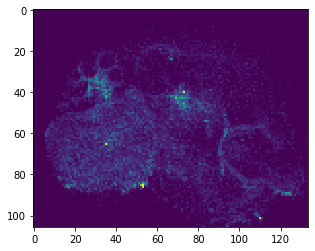

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.figure(figsize = (5,5))
p = plt.imshow(image[:, :, 2])
#image = image
#plt.imsave(os.path.join("D:/BMR-DS/Project_2/DataSet","brain_"+str(int(np.ceil(p)))+".png"), image)
plt.show()

path = "D:/BMR-DS/Project_2/DataSet/brain_mz_peaks/brain_905.png"
img = Image.open(path)
plt.imshow(np.array(img))

## Calculate the resolution before and after saving to .png

In [16]:
import miplib.ui.plots.image as showim
import miplib.data.io.read as imread
import miplib.processing.image as imops
from miplib.data.containers.image import Image as resImage

import miplib.analysis.resolution.fourier_ring_correlation as frc
from miplib.data.containers.fourier_correlation_data import FourierCorrelationDataCollection

import miplib.ui.plots.frc as frcplots
from miplib.ui.cli import miplib_entry_point_options as options

import urllib.request as dl
import miplib.data.io.read as imread

args_list = ("None --bin-delta=1  --frc-curve-fit-type=smooth-spline "  
             " --resolution-threshold-criterion=half-bit").split()
            
args = options.get_frc_script_options(args_list)

print (args)

Namespace(carma_det_idx=0, carma_gate_idx=0, channel=0, d_angle=20, d_bin=1, d_extract_angle=5.0, debug=False, directory='None', disable_hamming=False, enhance_contrast_on_save=False, evaluate_results=False, frc_curve_fit_degree=8, frc_curve_fit_type='smooth-spline', frc_mode='one-image', hollow_iterator=False, jupyter=False, min_filter=False, pathout=None, plot_size=(2.5, 2.5), resol_square=False, resolution_point_sigma=0.01, resolution_snr_value=0.25, resolution_threshold_criterion='half-bit', resolution_threshold_curve_fit_degree=3, resolution_threshold_value=0.14285714285714285, save_plots=False, scale=100, show_image=False, show_plots=False, temp_dir=None, test_drive=False, verbose=False, working_directory='/home/sami/Data')


In [17]:
resimage = resImage(image[:,:,0], [100.0, 100.0])
frc_results = frc.calculate_single_image_frc(resimage, args)
resimage = frc_results.resolution["resolution"]
print(resimage)

resimg = resImage(img, [100.0, 100.0])
frc_results = frc.calculate_single_image_frc(resimg, args)
resimg = frc_results.resolution["resolution"]
print(resimg)

11964.422915495412
640.5369102065163


## Calculate the ion image after peaks choosing

In [18]:
fdrpath = "D:/BMR-DS/Project_2/DataSet/brain_100um_mz_peaks_new"
flist = os.listdir(fdrpath)
frc_results = dict()

for f in flist:
    fpath = os.path.join(fdrpath, f)
    image = imageio.imread(fpath)
    resimage = resImage(image, [100.0, 100.0])
    try:
        frc_results[f] = frc.calculate_single_image_frc(resimage, args)
        resimage = frc_results[f].resolution["resolution"]
    except:
        print(f)

brain_284.png
brain_285.png
brain_287.png
brain_295.png
brain_304.png
brain_307.png
brain_309.png
brain_647.png
brain_649.png
brain_665.png
brain_768.png
brain_779.png
brain_817.png
brain_835.png


## Plot the failed ones without fitting 

brain_256.png

brain_284.png

brain_300.png

brain_307.png

Frequency: 
 [0.         0.03030303 0.06060606 0.09090909 0.12121212 0.15151516
 0.18181819 0.21212122 0.24242425 0.27272728 0.3030303  0.33333334
 0.36363637 0.3939394  0.42424244 0.45454547 0.4848485  0.5151515
 0.54545456 0.57575756 0.6060606  0.6363636  0.6666667  0.6969697
 0.72727275 0.75757575]
Correlation: 
 [0.22089237 0.24518846 0.4754541  0.7892015  0.8003994  0.7727234
 0.96342444 0.99139416 0.9541179  0.7737663  0.6371397  0.49364263
 0.32661927 0.47226584 0.33056343 0.116935   0.20781499 0.31109616
 0.20716932 0.10392145 0.10566969 0.07045583 0.0523768  0.00266513
 0.05747419 0.08476025]


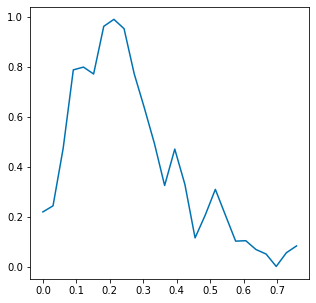

In [132]:
fpath = "D:/BMR-DS/Project_2/DataSet/brain_mz_peaks/brain_307.png"
image = imageio.imread(fpath)
resimage = resImage(image, [100.0, 100.0])
#frc_results[f] = frc.calculate_single_image_frc(resimage, args)
#resimage = frc_results[f].resolution["resolution"]
frc_results = frc.calculate_single_image_frc_without_fit(resimage, args)
X = frc_results[0].correlation["frequency"]
Y = frc_results[0].correlation["correlation"]
print("Frequency: \n {}".format(X))
print("Correlation: \n {}".format(Y))

plt.figure(figsize=(5,5))
plt.plot(X, Y)
